In [3]:
%matplotlib inline

In [4]:
import math

import matplotlib.pyplot as plt

# Since the solution has such a stupid name, we need a hack to import it
solution = __import__('04_cubic_ufo_without_scipy')
rotate_points = solution.rotate_points
project_points = solution.project_points
hull_area = solution.hull_area

In [5]:
corners = [
    [-.5, -.5, -.5],
    [-.5, -.5, +.5],
    [-.5, +.5, -.5],
    [-.5, +.5, +.5],
    [+.5, -.5, -.5],
    [+.5, -.5, +.5],
    [+.5, +.5, -.5], 
    [+.5, +.5, +.5],
]

In [6]:
def scipy_area(points):
    import scipy.spatial
    hull = scipy.spatial.ConvexHull(points)
    return hull.volume


def plot_points(points, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1,1)
    for i, point in enumerate(points):
        ax.plot(point[0], point[1], '*-')
        ax.text(point[0] + .05, point[1] , str(i))
    ax.set_xlabel('x-axis')
    ax.set_ylabel('z-axis')
    ax.set_aspect('equal')
    ax.axvline(0, color='black', linewidth=0.5)
    ax.axhline(0, color='black', linewidth=0.5)
    return ax

# Projection of initial cube

1.0

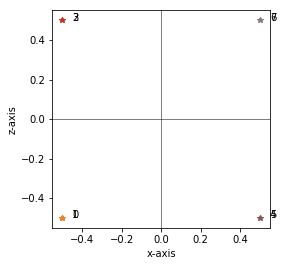

In [7]:
a = plot_points(corners)
scipy_area(corners)

## Rotate 45 degrees around each axis, one at the time

Text(0.5,1,'Pitch 45, area: 1.4142')

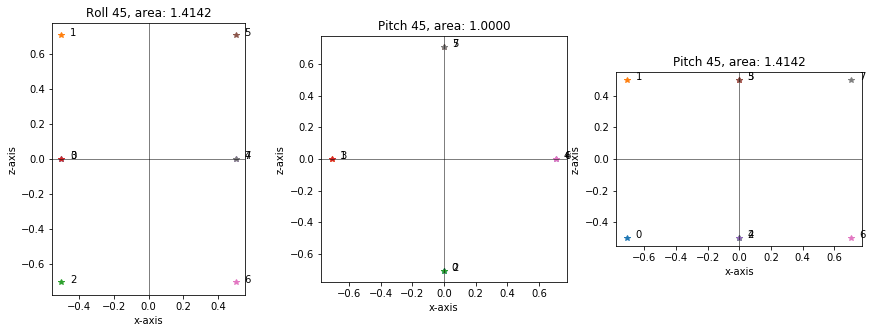

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

points = project_points(rotate_points(corners, 45/180*math.pi, 0, 0))
area = scipy_area(points)
plot_points(points, ax=ax[0])
ax[0].set_title('Roll 45, area: {:1.4f}'.format(area))

points = project_points(rotate_points(corners, 0, 45/180*math.pi, 0))
area = scipy_area(points)
plot_points(points, ax=ax[1])
ax[1].set_title('Pitch 45, area: {:1.4f}'.format(area))

points = project_points(rotate_points(corners, 0, 0, 45/180*math.pi))
area = scipy_area(points)
plot_points(points, ax=ax[2])
ax[2].set_title('Pitch 45, area: {:1.4f}'.format(area))

## Finding:
The cube is aligned with the axis. By rotating along either the x- or z-axis, we can increase the area. But at most, the area will be a rectangle with maximum area = sqrt(2). Rotating around the y-axis alone doesn't change the area of the projection. In order to increase the area, we need to rotate around two axis at the same time.

# Try rotating 45 degrees around both x- and z-axis

1.707106781186548

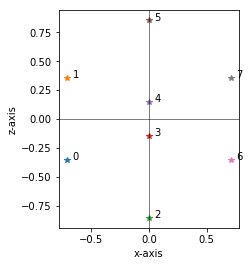

In [9]:
points = project_points(rotate_points(corners, 45/180*math.pi, 0, 45/180*math.pi))
plot_points(points)
scipy_area(points)

In [10]:
.5 * math.atan(2*math.sqrt(2)) / math.pi * 180

35.264389682754654

## To get the two middle corners on top of each other, we must adjust the x-rotation
It turns out that the maximum area is reached when the x-angle is half the "dihedral angle": $1/2\,arctan(2\sqrt{2}) \approx 35.26 \,^\circ$. Look at https://en.wikipedia.org/wiki/Tetrahedron for details on tetrahedon angles.

1.7320508075688774

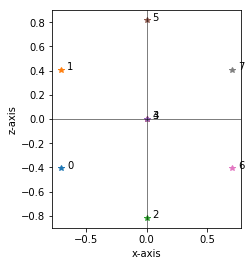

In [11]:
roll = .5 * math.atan(2*math.sqrt(2))
points = project_points(rotate_points(corners, roll, 0, 45/180*math.pi))
plot_points(points)
scipy_area(points)

# Fixing z-rotation at 45 and varying x-rotation between 0 and 90

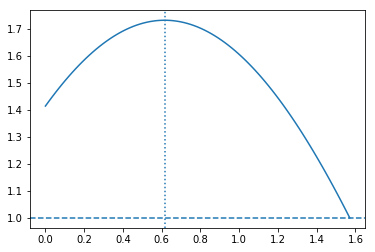

In [12]:
pitch = 0
yaw = 45/180*math.pi
roll_angles = [a/180*math.pi for a in range(91)]
areas = []
for roll in roll_angles:
    points = project_points(rotate_points(corners, roll, pitch, yaw))
    areas.append(scipy_area(points))

fig, ax = plt.subplots(1,1)
ax.plot(roll_angles, areas)
ax.axhline(1, ls='--')
ax.axvline(.5 * math.atan(2*math.sqrt(2)), ls=':')

## Finding:

We'll fix y-rotation at 0 and z-rotation at 45. By changing x-rotation between $1/2\,arctan(2\sqrt{2})$ and $1/2\, \pi$, we can cover all possible values for the area. Thus, we can search in that range in order to find the specified area.

# We need a way to find the area without using scipy

If we order the corners cleverly, the first 6 corners of the cube form a polygon (hexagon). The two internal points can just be removed. Ordering them like this simplfies the calculation of the area, since the polygon is "simple".

In [13]:
ordered_corners = [
    [-.5, +.5, -.5],
    [+.5, +.5, -.5], 
    [+.5, +.5, +.5],
    [+.5, -.5, +.5],
    [-.5, -.5, +.5],
    [-.5, -.5, -.5],
    [+.5, -.5, -.5],
    [-.5, +.5, +.5],
]

1.707106781186548

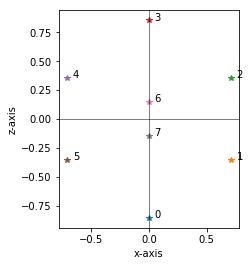

In [14]:
points = project_points(rotate_points(ordered_corners, 45/180*math.pi, 0, 45/180*math.pi))
plot_points(points)
scipy_area(points)

## Compare the two methods for some angles

In [15]:
roll_angles = [a/180*math.pi for a in range(0,91,5)]
for roll in roll_angles:
    points = project_points(rotate_points(ordered_corners, roll, 0, 45/180*math.pi))
    a_scipy = scipy_area(points)
    a_hull = hull_area(points[:6])
    print("Angle: {:01.0f}, error: {:1.1e}".format(roll/math.pi*180, a_scipy - a_hull))

Angle: 0, error: -2.2e-16
Angle: 5, error: 2.2e-16
Angle: 10, error: 2.2e-16
Angle: 15, error: -4.4e-16
Angle: 20, error: 2.2e-16
Angle: 25, error: 0.0e+00
Angle: 30, error: 0.0e+00
Angle: 35, error: -2.2e-16
Angle: 40, error: -2.2e-16
Angle: 45, error: 0.0e+00
Angle: 50, error: -2.2e-16
Angle: 55, error: 2.2e-16
Angle: 60, error: -2.2e-16
Angle: 65, error: -2.2e-16
Angle: 70, error: 0.0e+00
Angle: 75, error: 4.4e-16
Angle: 80, error: 0.0e+00
Angle: 85, error: 2.2e-16
Angle: 90, error: 2.2e-16


# And we need a search-algorithm
The below implements binary search where an x- is changed in order to find y. Since we're searching for a float, the resolution matters. The below gradually reduces the resolution as we get closed to the correct answer. 

In [16]:
def get_area(angle):
    points = project_points(rotate_points(ordered_corners, angle, 0, 45/180*math.pi))
    return hull_area(points[:6])

def binary_search(specified_area):
    area_resolution = 1e-10
    max_guesses = 100
    left = .5 * math.atan(2*math.sqrt(2))
    right = .5 * math.pi
    angle_resolution = (right - left)/10
    
    for guess in range(max_guesses):
        middle = (left + right) / 2
        area = get_area(middle)
        
        if abs(area - specified_area) < area_resolution:
            print('Found area within precision {:1.0e} after {} iterations'.format(area_resolution, guess))
            break
        elif area < specified_area:
            # Need to move the right boundary
            while (get_area(middle - angle_resolution) > specified_area) or ((middle - angle_resolution) < left):
                # Moving middle with resolution would take us to the other side of the optimum.
                angle_resolution = angle_resolution / 10
                print("Right: Reducing angle resolution: {} {:1.0e}".format(guess, angle_resolution))
            right = middle - angle_resolution                
        elif area > specified_area:
            # Need to move the left boundary
            while (get_area(middle + angle_resolution) < specified_area) or ((middle + angle_resolution) > right):
                # Moving middle with resolution would take us to the other side of the optimum.
                angle_resolution = angle_resolution / 10
                print("Left: Reducing angle resolution: {} {:1.0e}".format(guess, angle_resolution))
            left = middle + angle_resolution
    else:
        print("Didn't find solution with requested presicion, after {} iterations".format(guess))
        
    return middle, area

## Test the method for some known cases

In [17]:
# Max area = sqrt(3) should give an angle of .5*math.atan(2*math.sqrt(2))
result = binary_search(math.sqrt(3))
result[0] - .5*math.atan(2*math.sqrt(2))

Right: Reducing angle resolution: 2 1e-02
Right: Reducing angle resolution: 4 1e-03
Right: Reducing angle resolution: 6 1e-04
Right: Reducing angle resolution: 8 1e-05
Found area within precision 1e-10 after 10 iterations


4.7765830906154605e-06

In [18]:
# Min area = 1 should give an angle of pi/2
result = binary_search(1)
result[0] - math.pi/2

Left: Reducing angle resolution: 2 1e-02
Left: Reducing angle resolution: 4 1e-03
Left: Reducing angle resolution: 6 1e-04
Left: Reducing angle resolution: 8 1e-05
Left: Reducing angle resolution: 10 1e-06
Left: Reducing angle resolution: 12 1e-07
Left: Reducing angle resolution: 14 1e-08
Left: Reducing angle resolution: 16 1e-09
Left: Reducing angle resolution: 18 1e-10
Found area within precision 1e-10 after 20 iterations


-4.7765791322262885e-11

In [19]:
result = binary_search(1.2)
result

Left: Reducing angle resolution: 1 1e-02
Right: Reducing angle resolution: 3 1e-03
Left: Reducing angle resolution: 8 1e-04
Left: Reducing angle resolution: 8 1e-05
Right: Reducing angle resolution: 10 1e-06
Left: Reducing angle resolution: 15 1e-07
Right: Reducing angle resolution: 16 1e-08
Right: Reducing angle resolution: 21 1e-09
Right: Reducing angle resolution: 24 1e-10
Found area within precision 1e-10 after 26 iterations


(1.420883209288291, 1.1999999999457174)